In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Part 3: Advanced Pandas and Real-World Application

### 3.1 Data Exploration and Analysis (Real-world Dataset)

Download a real-world dataset (e.g., Titanic dataset, or any dataset of your choice) from Kaggle or another source.

In [39]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Load the dataset into a Pandas DataFrame and perform the following tasks:

Display the first 10 rows of the dataset.

In [40]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Check the summary statistics (e.g., mean, standard deviation, etc.) for numeric columns.

In [41]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handle missing data by either filling or removing it (depending on the type of data and the column).

In [42]:
df.fillna({
    "age": df["age"].mean(),
    "embark_town": df["embark_town"].mode()[0],
    "deck": df["deck"].mode()[0]
}, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Convert categorical columns into numeric ones using encoding techniques such as pd.get_dummies().

In [43]:
encoded_df = pd.get_dummies(df, columns=["sex", "class", "embark_town", "who", "deck", "embarked", "alive"], drop_first=True)
encoded_df

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,class_Second,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_Q,embarked_S,alive_yes
0,0,3,22.000000,1,0,7.2500,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,1,1,38.000000,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.000000,0,0,7.9250,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
3,1,1,35.000000,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.000000,0,0,8.0500,True,True,True,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,True,True,True,...,False,False,True,False,False,False,False,False,True,False
887,1,1,19.000000,0,0,30.0000,False,True,False,False,...,True,True,False,False,False,False,False,False,True,True
888,0,3,29.699118,1,2,23.4500,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
889,1,1,26.000000,0,0,30.0000,True,True,True,False,...,False,False,True,False,False,False,False,False,False,True


###3.2 Data Visualization with Pandas and Matplotlib

Use Pandas to plot:

A histogram of a numeric column.

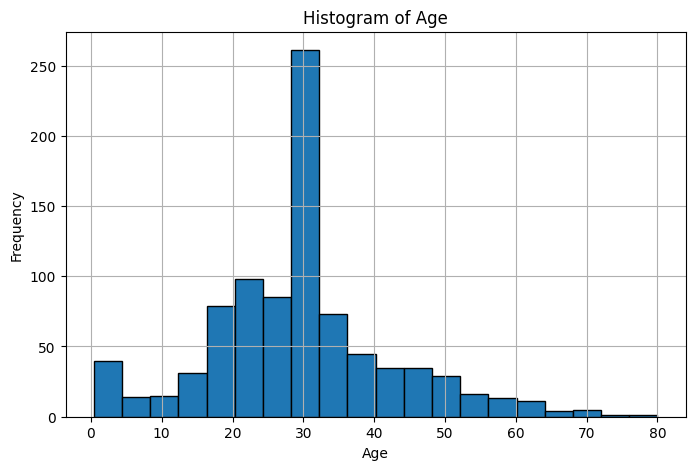

In [44]:
plt.figure(figsize=(8, 5))
df["age"].hist(bins=20, edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

A box plot to visualize the distribution of a column.

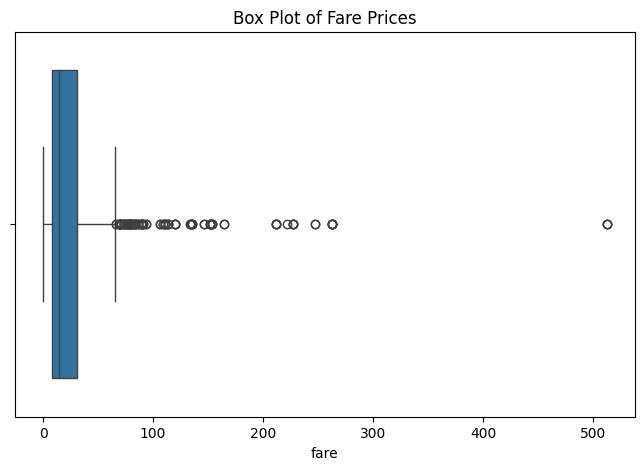

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fare"])
plt.title("Box Plot of Fare Prices")
plt.show()

A correlation matrix to explore the relationships between numerical columns.

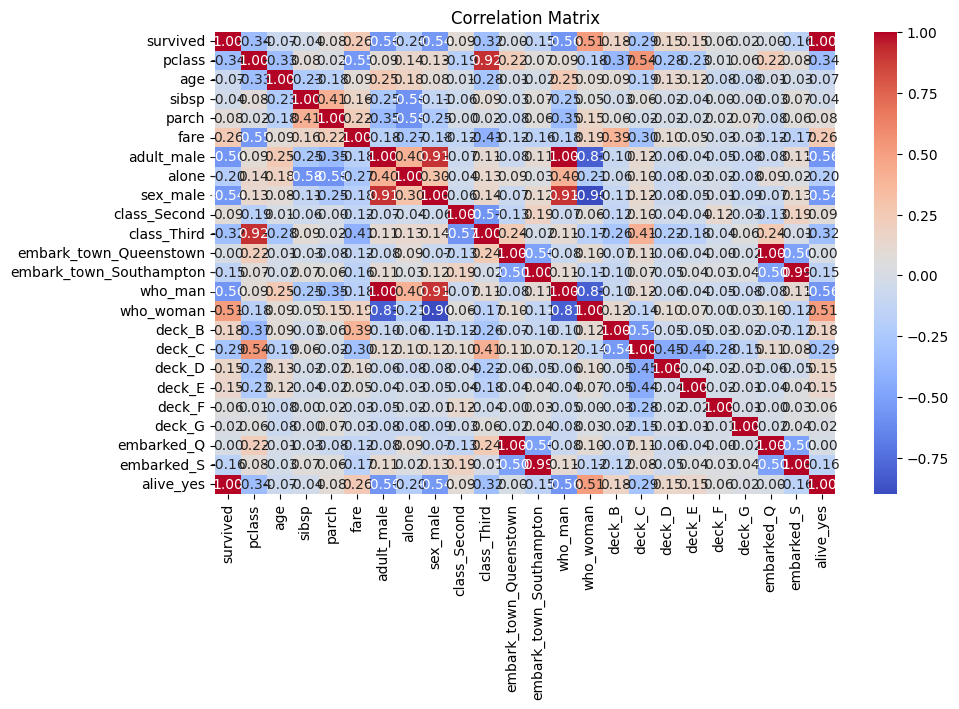

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

###3.3 Time-Series Data

Load a time-series dataset (e.g., stock prices over time) and perform the following tasks:

In [47]:
df_time_series = pd.read_csv('stock_data.csv')
df_time_series

,Date,Open,High,Low,Close,Volume
0,2023-01-01,150.25,153.5,149.8,152.3,1000000
1,2023-01-02,152.60,154.8,151.5,153.2,1200000
2,2023-01-03,153.10,156.0,152.0,154.5,1100000
3,2023-01-04,154.80,157.0,153.9,156.1,1300000
4,2023-01-05,156.20,158.0,155.5,157.3,1150000
5,2023-01-06,157.40,159.1,156.5,158.4,1250000
6,2023-01-07,158.50,160.2,157.6,159.0,1180000
7,2023-01-08,159.20,161.1,158.3,160.0,1220000
8,2023-01-09,160.30,162.0,159.5,161.1,1230000
9,2023-01-10,161.50,163.0,160.4,162.2,1270000


Convert the 'Date' column to a datetime object.

In [48]:
df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])
df_time_series

,Date,Open,High,Low,Close,Volume
0,2023-01-01,150.25,153.5,149.8,152.3,1000000
1,2023-01-02,152.60,154.8,151.5,153.2,1200000
2,2023-01-03,153.10,156.0,152.0,154.5,1100000
3,2023-01-04,154.80,157.0,153.9,156.1,1300000
4,2023-01-05,156.20,158.0,155.5,157.3,1150000
5,2023-01-06,157.40,159.1,156.5,158.4,1250000
6,2023-01-07,158.50,160.2,157.6,159.0,1180000
7,2023-01-08,159.20,161.1,158.3,160.0,1220000
8,2023-01-09,160.30,162.0,159.5,161.1,1230000
9,2023-01-10,161.50,163.0,160.4,162.2,1270000


Set the 'Date' column as the index of the DataFrame.

In [49]:
df_time_series.set_index('Date', inplace=True)
df_time_series

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-01,150.25,153.5,149.8,152.3,1000000
2023-01-02,152.60,154.8,151.5,153.2,1200000
2023-01-03,153.10,156.0,152.0,154.5,1100000
2023-01-04,154.80,157.0,153.9,156.1,1300000
2023-01-05,156.20,158.0,155.5,157.3,1150000
2023-01-06,157.40,159.1,156.5,158.4,1250000
2023-01-07,158.50,160.2,157.6,159.0,1180000
2023-01-08,159.20,161.1,158.3,160.0,1220000
2023-01-09,160.30,162.0,159.5,161.1,1230000


Resample the data to show the average value per month.

In [50]:
df_monthly = df_time_series.resample('M').mean()
df_monthly

<ipython-input-50-790169013cf6>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_time_series.resample('M').mean()


,Open,High,Low,Close,Volume
Date,,,,,
2023-01-31,156.385,158.47,155.5,157.41,1190000.0


Plot the time series data over time.

In [51]:
df_monthly['Close'] = df_monthly['Close'].interpolate()
df_monthly

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-31,156.385,158.47,155.5,157.41,1190000.0


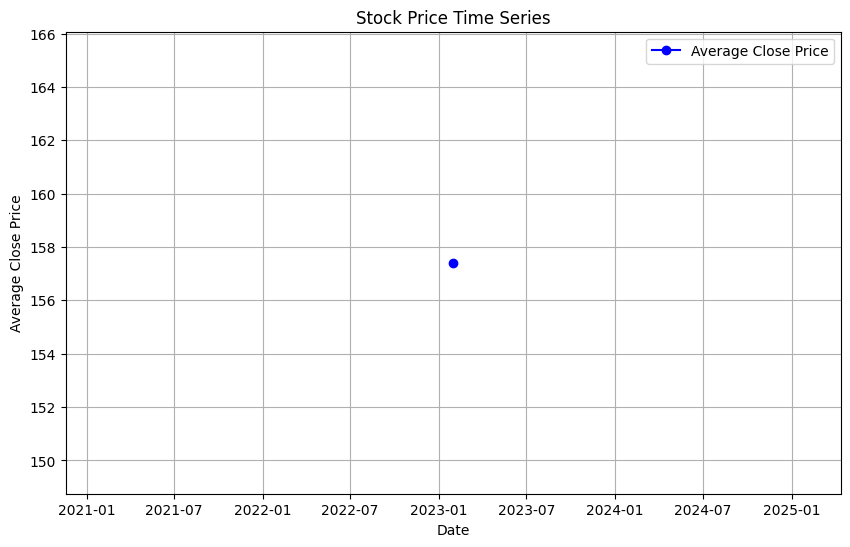

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Close'], marker='o', linestyle='-', label='Average Close Price', color='b')
plt.title('Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.legend()
plt.grid(True)
plt.show()

### Part 3 DONE!!